## Import Packages and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose,STL

In [2]:
aapl_df = pd.read_csv("AAPL - Clean.csv")
bikes_df = pd.read_csv("BikeCounter - Clean.csv")
sensor_df = pd.read_csv("sensor - clean.csv")

(Data has already been cleaned with null values handled)

## AAPL Decomposition

In [3]:
aapl_df['Date'] = pd.to_datetime(aapl_df['Date'])
aapl_df.set_index('Date',inplace=True)
aapl_df.head()

,Close
Date,
2006-01-03,10.68
2006-01-04,10.71
2006-01-05,10.63
2006-01-06,10.90
2006-01-09,10.86


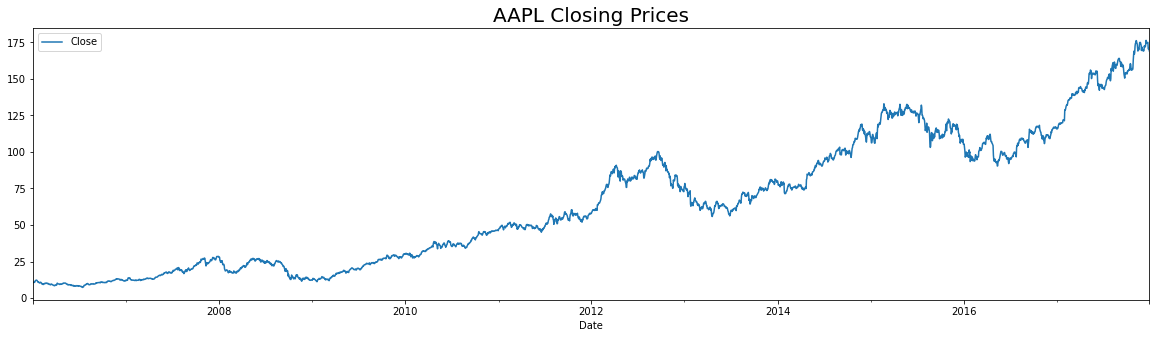

In [4]:
aapl_df.plot(figsize=(20,5))
plt.title("AAPL Closing Prices", size = 20)
plt.show()

In [5]:
aapl_decomposed = seasonal_decompose(aapl_df,model='additive')

In [ ]:
fig = aapl_decomposed.plot()
fig.set_size_inches((16, 9))
plt.show()

## Fremont Bike Counter Decomposed

In [ ]:
bikes_df['Date'] = pd.to_datetime(bikes_df['Date'])
bikes_df.set_index('Date',inplace=True)
bikes_df.head()

In [ ]:
bikes_df.plot(figsize=(20,5))
plt.title("Fremont Bike Counter", size = 20)
plt.show()

In [ ]:
bikes_decomposed = seasonal_decompose(bikes_df, model='addititve')

In [ ]:
fig = bikes_decomposed.plot()
fig.set_size_inches((16, 9))
plt.show()

In [ ]:
bikes_df = bikes_df.resample('M').sum()
bikes_df.head()

In [ ]:
bikes_decomposed = seasonal_decompose(bikes_df, model='addititve')
fig = bikes_decomposed.plot()
fig.set_size_inches((16, 9))
plt.show()

## Sensor Data Decomposed

In [ ]:
sensor_df['timestamp'] = pd.to_datetime(sensor_df['timestamp'])
sensor_df.set_index('timestamp',inplace=True)
sensor_df.head()

In [ ]:
sensor_decomposed = seasonal_decompose(sensor_df, model = 'additive')

In [ ]:
fig = sensor_decomposed.plot()
fig.set_size_inches((16, 9))
plt.show()

In [ ]:
sensor_decomposed.seasonal.plot(figsize=(20,5))
plt.show()

In [ ]:
sensor_df = sensor_df.resample('D').sum()

In [ ]:
sensor_decomposed = seasonal_decompose(sensor_df, model = 'additive')

In [ ]:
fig = sensor_decomposed.plot()
fig.set_size_inches((16, 9))
plt.show()

In [ ]:
sensor_decomposed.seasonal.plot(figsize=(20,5))
plt.show()

## Hodrick Prescott Filter

HP filter is a smoothing filter that can separate short-term cyclic variations from long-term trends

In [ ]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [ ]:
sensor_df = pd.read_csv('sensor - clean.csv')
sensor_df.set_index('timestamp',inplace=True)
sensor_df.head()

In [ ]:
sensor_df.plot(figsize=(20,5))
plt.title("Sensor Hourly Readings")
plt.show()

In [ ]:
sensor_cyclic, sensor_trend = hpfilter(sensor_df)

In [ ]:
sensor_cyclic.plot(figsize=(20,5))
plt.title("Sensor Cyclic Pattern")
plt.show()

In [ ]:
sensor_trend.plot(figsize=(20,5))
plt.title('Sensor Trend')
plt.show()